### TODOS

- [ ] Compare results per rider
- [ ] Compare clustering vs. classification
- [ ] Implement some sort of preprocessing
- [ ] What about sub window sizes
- [ ] What about even larger window sizes?
- [ ] Compare multiple labels, also surfaces

In [1]:
%load_ext autoreload
%autoreload 2

# add src to sys-path
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('./src')
from matplotlib.pyplot import figure
from geopy.distance import geodesic
from sklearn.decomposition import PCA

from data_processing.mtb_data_provider import MtbDataProvider
from data_processing.mtb_data_tagger import MtbDataTagger
from data_processing.mtb_classifier import MtbClassifier
from visualization.mtb_visualizer import MtbVisualizer
from data_processing.helpers import Helpers

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, SpectralClustering, MeanShift, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import geopandas as gpd
from geopandas import GeoDataFrame
from sklearn.utils import shuffle

from numpy.random import seed
import tensorflow
tensorflow.random.set_seed(42)
seed(42)
np.random.seed(42)

SPEED_THRESHOLD = .3
LATITUDE_KEY = 'position_lat'
LONGITUDE_KEY = 'position_long'

In [ ]:
df = pd.read_csv('data/warngau_s2_labels_2.csv')

lats = df['latitude'].values
lons = df['longitude'].values

data = []
last_coordinates = (0,0)
for value_set in df.values:
    coordinates = (value_set[0], value_set[1])
    # Join the labels to one string
    new_value_set = np.hstack([value_set[:2], '-'.join(value_set[2:5]), value_set[-1]])
    
    # When changing labels, the app writes each change. Just take the latest label for one position in this case
    if coordinates == last_coordinates:
        data[-1] = new_value_set
    else:
        data.append(new_value_set)
        last_coordinates = coordinates
        

le = preprocessing.LabelEncoder()
data = np.array(data)
encoded_labels = le.fit_transform(data[:, 2])

labels, counts = np.unique(data[:, 2], return_counts=True)
counts > 3
labels = labels[counts>=5]
#data = data[data[:, 2] in labels]
#for d in data[:, 2] if d in labels
#len(data)
list(filter(lambda dic: dic[2] in labels, data))
    


In [44]:
mtb_data_provider = MtbDataProvider()
mtb_data_tagger = MtbDataTagger()
mtb_visualizer = MtbVisualizer()
mtb_classifier = MtbClassifier()

## Data Export

In [162]:
dataset_filename='mtb_dataset_20200924'
input_columns = ['timestamp', 'SensorAccelerationX_HD', 'SensorAccelerationY_HD', 'SensorAccelerationZ_HD','altitude', 'SensorSpeed', 'heart_rate', 'SensorHeading', LATITUDE_KEY, LONGITUDE_KEY]
label_columns=['osm_mtb:scale', 'osm_surface', 'trailforks_difficulty', 'trailforks_physical_rating', 'trailforks_difficulty_user_avg', 'trailforks_amtb-rating']
window_lengths = [150, 300, 600, 1500]
sub_sample_lengths = [50, 150, 300, 600]

In [132]:
if True:
    mtb_data_provider.prepare_and_save_samples(
        dataset_filename, 
        input_columns, 
        label_columns,
        window_lengths=window_lengths, 
        sub_sample_lengths=sub_sample_lengths, 
        force_overwrite=True,
        auto_padd_left_right=True,
        min_cluster_size=1)

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (15,16,17,19,20,22,23,24,25,27,30,32,34,40) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Calculating Features: (1139, 150, 9) 50



Calculating Features: (1115, 150, 9) 50



Calculating Features: (240, 150, 9) 50



Calculating Features: (2286, 150, 9) 50



Calculating Features: (1429, 150, 9) 50



Calculating Features: (938, 150, 9) 50



Calculating Features: (895, 150, 9) 50



Calculating Features: (4840, 150, 9) 50



Calculating Features: (985, 150, 9) 50



Calculating Features: (995, 150, 9) 50



Calculating Features: (677, 150, 9) 50



Calculating Features: (929, 150, 9) 50



raw: (16468, 152, 9)
features: (16468, 17)
labels: (16468, 6) (array(['0', '1', '2', '3', '4', '5', '6', 'concrete', 'dirt',
       'fine_gravel', 'gravel', 'ground', 'unpaved'], dtype='<U21'), array([65160,  7394,  4623,  5674,  5876,   675,   399,     5,  3217,
           2,  1298,  2651,  1834]))
--------------------------------

Calculating Features: (1139, 150, 9) 150



Calculating Features: (1115, 150, 9) 150



Calculating Features: (240, 150, 9) 150



Calculating Features: (2286, 150, 9) 150



Calculating Features: (1429, 150, 9) 150



Calculating Features: (938, 150, 9) 150



Calculating Features: (895, 150, 9) 150



Calculating Features: (4840, 150, 9) 150



Calculating Features: (985, 150, 9) 150



Calculating Features: (995, 150, 9) 150



Calculating Features: (677, 150, 9) 150



Calculating Features: (929, 150, 9) 150



raw: (16468, 152, 9)
features: (16468, 17)
labels: (16468, 6) (array(['0', '1', '2', '3', '4', '5', '6', 'concrete', 'dirt',
       'fine_gravel', 'gravel', 'ground', 'unpaved'], dtype='<U21'), array([65160,  7394,  4623,  5674,  5876,   675,   399,     5,  3217,
           2,  1298,  2651,  1834]))
--------------------------------

Calculating Features: (562, 300, 9) 50



Calculating Features: (550, 300, 9) 50



Calculating Features: (119, 300, 9) 50



Calculating Features: (1128, 300, 9) 50



Calculating Features: (705, 300, 9) 50



Calculating Features: (463, 300, 9) 50



Calculating Features: (442, 300, 9) 50



Calculating Features: (2388, 300, 9) 50



Calculating Features: (486, 300, 9) 50



Calculating Features: (491, 300, 9) 50



Calculating Features: (334, 300, 9) 50



Calculating Features: (458, 300, 9) 50



raw: (8126, 300, 9)
features: (8126, 17)
labels: (8126, 6) (array(['0', '1', '2', '3', '4', '5', '6', 'concrete', 'dirt', 'gravel',
       'ground', 'unpaved'], dtype='<U21'), array([31792,  3711,  2334,  2853,  2998,   343,   205,     3,  1612,
         646,  1352,   907]))
--------------------------------

Calculating Features: (562, 300, 9) 150



Calculating Features: (550, 300, 9) 150



Calculating Features: (119, 300, 9) 150



Calculating Features: (1128, 300, 9) 150



Calculating Features: (705, 300, 9) 150



Calculating Features: (463, 300, 9) 150



Calculating Features: (442, 300, 9) 150



Calculating Features: (2388, 300, 9) 150



Calculating Features: (486, 300, 9) 150



Calculating Features: (491, 300, 9) 150



Calculating Features: (334, 300, 9) 150



Calculating Features: (458, 300, 9) 150



raw: (8126, 300, 9)
features: (8126, 17)
labels: (8126, 6) (array(['0', '1', '2', '3', '4', '5', '6', 'concrete', 'dirt', 'gravel',
       'ground', 'unpaved'], dtype='<U21'), array([31792,  3711,  2334,  2853,  2998,   343,   205,     3,  1612,
         646,  1352,   907]))
--------------------------------

Calculating Features: (562, 300, 9) 300



Calculating Features: (550, 300, 9) 300



Calculating Features: (119, 300, 9) 300



Calculating Features: (1128, 300, 9) 300



Calculating Features: (705, 300, 9) 300



Calculating Features: (463, 300, 9) 300



Calculating Features: (442, 300, 9) 300



Calculating Features: (2388, 300, 9) 300



Calculating Features: (486, 300, 9) 300



Calculating Features: (491, 300, 9) 300



Calculating Features: (334, 300, 9) 300



Calculating Features: (458, 300, 9) 300



raw: (8126, 300, 9)
features: (8126, 17)
labels: (8126, 6) (array(['0', '1', '2', '3', '4', '5', '6', 'concrete', 'dirt', 'gravel',
       'ground', 'unpaved'], dtype='<U21'), array([31792,  3711,  2334,  2853,  2998,   343,   205,     3,  1612,
         646,  1352,   907]))
--------------------------------

Calculating Features: (281, 600, 9) 50



Calculating Features: (275, 600, 9) 50



Calculating Features: (60, 600, 9) 50



Calculating Features: (564, 600, 9) 50



Calculating Features: (353, 600, 9) 50



Calculating Features: (232, 600, 9) 50



Calculating Features: (221, 600, 9) 50



Calculating Features: (1194, 600, 9) 50



Calculating Features: (243, 600, 9) 50



Calculating Features: (246, 600, 9) 50



Calculating Features: (167, 600, 9) 50



Calculating Features: (229, 600, 9) 50



raw: (4065, 600, 9)
features: (4065, 17)
labels: (4065, 6) (array(['0', '1', '2', '3', '4', '5', '6', 'dirt', 'gravel', 'ground',
       'unpaved'], dtype='<U21'), array([15957,  1866,  1185,  1368,  1448,   165,   103,   825,   332,
         694,   447]))
--------------------------------

Calculating Features: (281, 600, 9) 150



Calculating Features: (275, 600, 9) 150



Calculating Features: (60, 600, 9) 150



Calculating Features: (564, 600, 9) 150



Calculating Features: (353, 600, 9) 150



Calculating Features: (232, 600, 9) 150



Calculating Features: (221, 600, 9) 150



Calculating Features: (1194, 600, 9) 150



Calculating Features: (243, 600, 9) 150



Calculating Features: (246, 600, 9) 150



Calculating Features: (167, 600, 9) 150



Calculating Features: (229, 600, 9) 150



raw: (4065, 600, 9)
features: (4065, 17)
labels: (4065, 6) (array(['0', '1', '2', '3', '4', '5', '6', 'dirt', 'gravel', 'ground',
       'unpaved'], dtype='<U21'), array([15957,  1866,  1185,  1368,  1448,   165,   103,   825,   332,
         694,   447]))
--------------------------------

Calculating Features: (281, 600, 9) 300



Calculating Features: (275, 600, 9) 300



Calculating Features: (60, 600, 9) 300



Calculating Features: (564, 600, 9) 300



Calculating Features: (353, 600, 9) 300



Calculating Features: (232, 600, 9) 300



Calculating Features: (221, 600, 9) 300



Calculating Features: (1194, 600, 9) 300



Calculating Features: (243, 600, 9) 300



Calculating Features: (246, 600, 9) 300



Calculating Features: (167, 600, 9) 300



Calculating Features: (229, 600, 9) 300



raw: (4065, 600, 9)
features: (4065, 17)
labels: (4065, 6) (array(['0', '1', '2', '3', '4', '5', '6', 'dirt', 'gravel', 'ground',
       'unpaved'], dtype='<U21'), array([15957,  1866,  1185,  1368,  1448,   165,   103,   825,   332,
         694,   447]))
--------------------------------

Calculating Features: (281, 600, 9) 600



Calculating Features: (275, 600, 9) 600



Calculating Features: (60, 600, 9) 600



Calculating Features: (564, 600, 9) 600



Calculating Features: (353, 600, 9) 600



Calculating Features: (232, 600, 9) 600



Calculating Features: (221, 600, 9) 600



Calculating Features: (1194, 600, 9) 600



Calculating Features: (243, 600, 9) 600



Calculating Features: (246, 600, 9) 600



Calculating Features: (167, 600, 9) 600



Calculating Features: (229, 600, 9) 600



raw: (4065, 600, 9)
features: (4065, 17)
labels: (4065, 6) (array(['0', '1', '2', '3', '4', '5', '6', 'dirt', 'gravel', 'ground',
       'unpaved'], dtype='<U21'), array([15957,  1866,  1185,  1368,  1448,   165,   103,   825,   332,
         694,   447]))
--------------------------------

Calculating Features: (113, 1500, 9) 50



Calculating Features: (110, 1500, 9) 50



Calculating Features: (24, 1500, 9) 50



Calculating Features: (226, 1500, 9) 50



Calculating Features: (141, 1500, 9) 50



Calculating Features: (93, 1500, 9) 50



Calculating Features: (89, 1500, 9) 50



Calculating Features: (478, 1500, 9) 50



Calculating Features: (98, 1500, 9) 50



Calculating Features: (99, 1500, 9) 50



Calculating Features: (67, 1500, 9) 50



Calculating Features: (92, 1500, 9) 50



raw: (1630, 1500, 9)
features: (1630, 17)
labels: (1630, 6) (array(['0', '1', '2', '3', '4', '5', '6', 'dirt', 'gravel', 'ground',
       'unpaved'], dtype='<U21'), array([6413,  763,  492,  507,  570,   59,   40,  335,  130,  292,  179]))
--------------------------------

Calculating Features: (113, 1500, 9) 150



Calculating Features: (110, 1500, 9) 150



Calculating Features: (24, 1500, 9) 150



Calculating Features: (226, 1500, 9) 150



Calculating Features: (141, 1500, 9) 150



Calculating Features: (93, 1500, 9) 150



Calculating Features: (89, 1500, 9) 150



Calculating Features: (478, 1500, 9) 150



Calculating Features: (98, 1500, 9) 150



Calculating Features: (99, 1500, 9) 150



Calculating Features: (67, 1500, 9) 150



Calculating Features: (92, 1500, 9) 150



raw: (1630, 1500, 9)
features: (1630, 17)
labels: (1630, 6) (array(['0', '1', '2', '3', '4', '5', '6', 'dirt', 'gravel', 'ground',
       'unpaved'], dtype='<U21'), array([6413,  763,  492,  507,  570,   59,   40,  335,  130,  292,  179]))
--------------------------------

Calculating Features: (113, 1500, 9) 300



Calculating Features: (110, 1500, 9) 300



Calculating Features: (24, 1500, 9) 300



Calculating Features: (226, 1500, 9) 300



Calculating Features: (141, 1500, 9) 300



Calculating Features: (93, 1500, 9) 300



Calculating Features: (89, 1500, 9) 300



Calculating Features: (478, 1500, 9) 300



Calculating Features: (98, 1500, 9) 300



Calculating Features: (99, 1500, 9) 300



Calculating Features: (67, 1500, 9) 300



Calculating Features: (92, 1500, 9) 300



raw: (1630, 1500, 9)
features: (1630, 17)
labels: (1630, 6) (array(['0', '1', '2', '3', '4', '5', '6', 'dirt', 'gravel', 'ground',
       'unpaved'], dtype='<U21'), array([6413,  763,  492,  507,  570,   59,   40,  335,  130,  292,  179]))
--------------------------------

Calculating Features: (113, 1500, 9) 600



Calculating Features: (110, 1500, 9) 600



Calculating Features: (24, 1500, 9) 600



Calculating Features: (226, 1500, 9) 600



Calculating Features: (141, 1500, 9) 600



Calculating Features: (93, 1500, 9) 600



Calculating Features: (89, 1500, 9) 600



Calculating Features: (478, 1500, 9) 600



Calculating Features: (98, 1500, 9) 600



Calculating Features: (99, 1500, 9) 600



Calculating Features: (67, 1500, 9) 600



Calculating Features: (92, 1500, 9) 600



raw: (1630, 1500, 9)
features: (1630, 17)
labels: (1630, 6) (array(['0', '1', '2', '3', '4', '5', '6', 'dirt', 'gravel', 'ground',
       'unpaved'], dtype='<U21'), array([6413,  763,  492,  507,  570,   59,   40,  335,  130,  292,  179]))
--------------------------------



## FI Clustering

In [ ]:
from keras.initializers import VarianceScaling
from keras.optimizers import SGD

mtb_classifier.train_and_compare_unsupervised_clusterings(
    mtb_data_provider, 
    dataset_input=dataset_filename, 
    label_column=0,
    ignore_label='0',
    run_dec=False,
    run_fidec=False,
    run_dcec=False,
    run_fidcec=False,
    run_classical_raw=True,
    run_classical_raw_fi=False,
    run_classical_features=True,
    run_cael2 = False,
    run_cael2fi = False,
    cael2_filters=[32, 64, 128],
#    dec_dims=[500, 1000, 3000, 7],
#    dcec_filters=[32, 64, 128],
#    pretrain_epochs = 300,
#    maxiter = 6e4,
#    dec_dims=[500, 500, 2000, 7],
#    dcec_filters=[32, 64, 128],
#    update_interval = 140,
#    pretrain_epochs = 300,
#    maxiter = 2e4,
#    init=VarianceScaling(scale=1. / 3., mode='fan_in', distribution='uniform'),
#    pretrain_optimizer=SGD(lr=1, momentum=0.9),
#    maxiter=1,
    window_lengths=window_lengths, 
    sub_sample_lengths=sub_sample_lengths)

In [ ]:
classifiers = [
KNeighborsClassifier(3),
#LinearSVC(C=0.025),
DecisionTreeClassifier(max_depth=5, random_state=42),
RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42),
MLPClassifier(alpha=1, max_iter=20000, random_state=42),
#KMeans(n_clusters=2),
]

names = [
    "Nearest Neighbors", 
#    "Linear SVM", 
    "Decision Tree", 
    "Random Forest", 
    "Neural Net", 
#   "KMeans",
]

mtb_classifier.run_classification(
    dataset_input = dataset_filename,     
    input_columns = input_columns, 
    label_column = 'osm_mtb:scale',
    ignore_label=0,
    window_lengths=window_lengths, 
    sub_sample_lengths=sub_sample_lengths,
    classifiers = classifiers, 
    classifier_names = names, 
    mtb_data_provider = mtb_data_provider, 
    mtb_visualizer = mtb_visualizer, 
    n_splits = 10, 
    clear_outliers = False, 
    print_plots = True)

In [ ]:
mtb_classifier.run_cnn_model(X_neureuth, y_neureuth, mtb_data_provider, mtb_visualizer, n_conv_blocks=3)

### Evaluation

In [155]:
def plot_scores(score_keys, window_lengths, sub_sample_lengths, scores):
    for score_key in score_keys:
        for window_length in window_lengths:
            for sub_sample_length in sub_sample_lengths:
                if sub_sample_length >= window_length:
                    continue

                window_prefix = "%s_%s_%s" % (score_key, str(window_length), str(sub_sample_length))

                figure(1, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
                legend = []
                has_data = False
                for key, score_array in scores.items():
                    if window_prefix in key:
                        has_data = True
                        plt.scatter(x=nums_clusters, y=score_array)
                        legend.append(key)
                
                if has_data:
                    print(window_prefix)
                    plt.legend(legend)
                    plt.show()

In [156]:
def plot_track(prefix, window_length, sub_sample_length, eval_prefixes, experiment_prefix):
    data_prefix = "%s_%s_%s" % (prefix, str(window_length), str(sub_sample_length))
    filename_features = "data/%s_features.npy" % data_prefix
    filename_labels = "data/%s_labels.npy" % data_prefix
    filename_raw = "data/%s_raw.npy" % data_prefix

    feature_file = np.load(filename_features)
    labels = np.load(filename_labels)
    labels = LabelEncoder().fit_transform(labels)
    raw_file = np.load(filename_raw)

    print('---- Ground Truth ----')
    geometry = gpd.points_from_xy(feature_file[:, -1], feature_file[:, -2])
    gdf = GeoDataFrame(geometry=geometry)
    gdf.plot(c=labels, figsize=(20, 30))
    plt.show()

    for eval_prefix in eval_prefixes:
        print('---- %s ----' % eval_prefix)
        filename_y_pred = "evaluation/%s_%s_y_pred.npy" % (experiment_prefix, eval_prefix)
        y_pred = np.load(filename_y_pred)
        gdf = GeoDataFrame(geometry=geometry)
        gdf.plot(c=y_pred, figsize=(20, 30))
        plt.show()

In [158]:
eval_prefixes = ['cael2', 'cael2fi', 'classical_raw', 'classical_raw_fi', 'classical_features', 'dcec', 'fidcec', 'dec', 'fidec']
#eval_prefixes = ['classical_features']
score_keys = ['adjusted_rand_score', 'adjusted_mutual_info_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'fowlkes_mallows_score', 'silhouette_score', 'davies_bouldin_score', 'calinski_harabasz_score']
score_keys_filter = ['adjusted_rand_score']#, 'robustness']

In [159]:
def process_results(prefix, eval_prefixes, score_keys, score_keys_filter, verbose=True):
    scores = dict()

    # TODO num_clusters won't work anymore
    for num_clusters in nums_clusters:
        for window_length in window_lengths:
            for sub_sample_length in sub_sample_lengths:
                if sub_sample_length >= window_length:
                    continue

                experiment_prefix = "%s_%s_%s_%s" % (prefix, str(window_length), str(sub_sample_length), str(num_clusters))

                results_complete = None
                for eval_prefix in eval_prefixes:
                    filename_scores = "evaluation/%s_%s_score.csv" % (experiment_prefix, eval_prefix)
                    results = pd.read_csv(filename_scores).values.T
                    results_complete = results if results_complete is None else np.vstack((results_complete, results[-1]))

                    for i in range(len(score_keys)):
                        score_prefix = "%s_%s_%s_%s" % (eval_prefix, score_keys[i], str(window_length), str(sub_sample_length))
                        if not score_prefix in scores:
                            scores[score_prefix] = []
                        scores[score_prefix].append(results[-1][i])


                    # -------- ROBUSTNESS --------
                    if 'robustness' in score_keys_filter:
                        data_prefix = "%s_%s_%s" % (prefix, str(window_length), str(sub_sample_length))
                        filename_y_pred = "evaluation/%s_%s_y_pred.npy" % (experiment_prefix, eval_prefix)
                        filename_features = "data/%s_features.npy" % data_prefix
                        feature_file = np.load(filename_features)
                        y_pred = np.load(filename_y_pred)

                        latitudes, longitudes = feature_file[:, -1], feature_file[:, -2]
                        y_pred_1 = []
                        y_pred_2 = []
                        min_position_delta = int(len(y_pred)/3)

                        for i in range(len(y_pred) - min_position_delta):
                            for j in range(i + min_position_delta, len(y_pred)):
                                location1 = (latitudes[i], longitudes[i])
                                location2 = (latitudes[j], longitudes[j])

                                distance = geodesic(location1, location2).meters
                                if distance < 6:
                                    y_pred_1.append(y_pred[i])
                                    y_pred_2.append(y_pred[j])
                                    continue

                        robustness = metrics.adjusted_rand_score(y_pred_1, y_pred_2)
                        score_prefix = "%s_%s_%s_%s" % (eval_prefix, 'robustness', str(window_length), str(sub_sample_length))
                        if not score_prefix in scores:
                            scores[score_prefix] = []
                        scores[score_prefix].append(robustness)

                        #-----------

                results_complete = results_complete.T
                header = np.hstack(([''], eval_prefixes))
                results_complete = np.insert(results_complete, 0, header, axis=0)

                # --------------------- HEADERS ---------------------
                if verbose:
                    print("----------------------------------------------------------------")
                    print("window_length:", window_length)
                    print("sub_sample_length:", sub_sample_length)
                    print("clusters:", num_clusters)


                    # --------------------- TABLES ---------------------
                    print(pd.DataFrame(results_complete.T), "\n\n")


                    # --------------------- Track PLOTS ---------------------

                    plot_track(prefix, window_length, sub_sample_length, eval_prefixes, experiment_prefix)

    return scores


In [160]:
def plot_random_samples(prefix, eval_prefix, window_length, sub_sample_length, num_clusters, 
                        columns,
                        num_sub_plots=4,
                       plot_all_in_one=False,
                       plot_each_dimension=True):
    data_prefix = "%s_%s_%s" % (prefix, str(window_length), str(sub_sample_length))
    filename_features = "data/%s_features.npy" % data_prefix
    filename_labels = "data/%s_labels.npy" % data_prefix
    filename_raw = "data/%s_raw.npy" % data_prefix
    experiment_prefix = "%s_%s" % (data_prefix, str(num_clusters))

    feature_file = np.load(filename_features)
    labels = np.load(filename_labels)
    raw_file = np.load(filename_raw)

    #for eval_prefix in eval_prefixes:
    print('---- %s ----' % eval_prefix)
    filename_y_pred = "evaluation/%s_%s_y_pred.npy" % (experiment_prefix, eval_prefix)
    y_pred = np.load(filename_y_pred)

    # -------- Plot All Dimensions In One --------
    if plot_all_in_one:
        for cluster in range(num_clusters):
            mask = y_pred == cluster
            fig, axes = plt.subplots(1,4, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15,3))

            axes[0].set_ylabel('Cluster-%s: %s' % (str(cluster), str(np.sum(mask))))

            indices = np.arange(len(raw_file))[mask]
            raw_samples = raw_file[:, :, :-4][mask]

            indices, raw_samples = shuffle(indices, raw_samples)

            for i, sample, ax in zip(indices, raw_samples, axes):
                ax.plot(sample)
                ax.set_title('Sample: %s' % str(i))

        plt.legend(columns)
        plt.show()
        
    # -------- Plot Dimensions Individually --------
    if plot_each_dimension:
        for i in range(len(columns[:-3])):
            print(columns[i])
            for cluster in range(num_clusters):
                mask = y_pred == cluster
                fig, axes = plt.subplots(1,num_sub_plots, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15,3))

                axes[0].set_ylabel('Cluster-%s: %s' % (str(cluster), str(np.sum(mask))))

                indices = np.arange(len(raw_file))[mask]

                dimension_data = raw_file[:, :, i][mask]
                indices, dimension_data = shuffle(indices, dimension_data)

                for j, sample, ax in zip(indices, dimension_data, axes):
                    ax.set_ylim([np.min(dimension_data),np.max(dimension_data)]) # TODO: Make this min/max of the selected feature
                    ax.plot(sample if i < 3 else sample[0::25])
                    ax.set_title('Sample: %s' % str(j))
                plt.show()

In [163]:
scores = process_results(dataset_filename, eval_prefixes, score_keys, score_keys_filter, verbose=False)

FileNotFoundError: [Errno 2] File evaluation/mtb_dataset_20200924_150_50_4_cael2_score.csv does not exist: 'evaluation/mtb_dataset_20200924_150_50_4_cael2_score.csv'

adjusted_rand_score_50_25


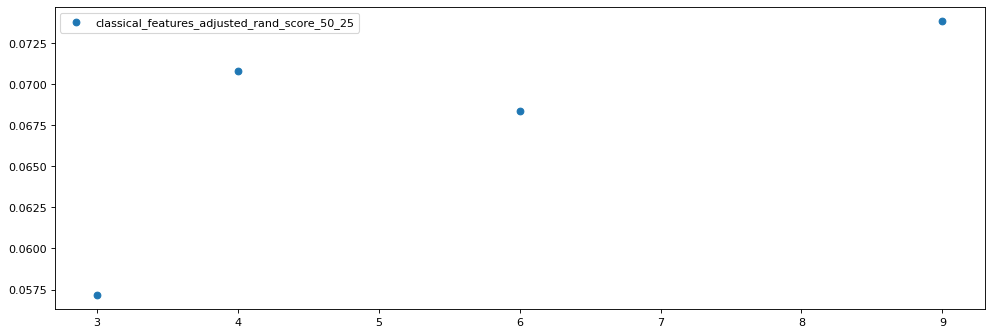

adjusted_rand_score_150_25


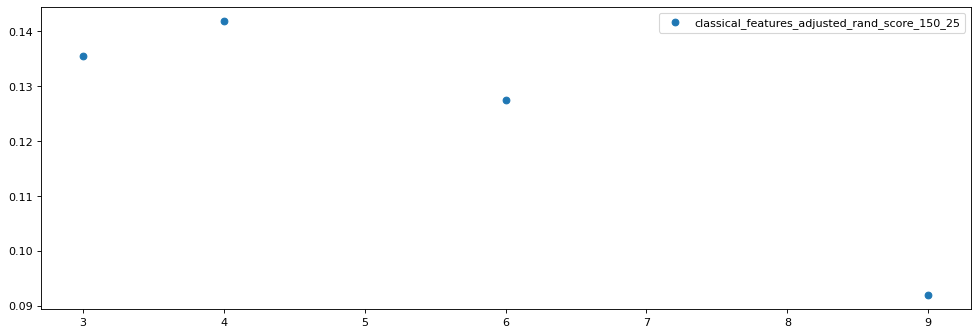

adjusted_rand_score_150_75


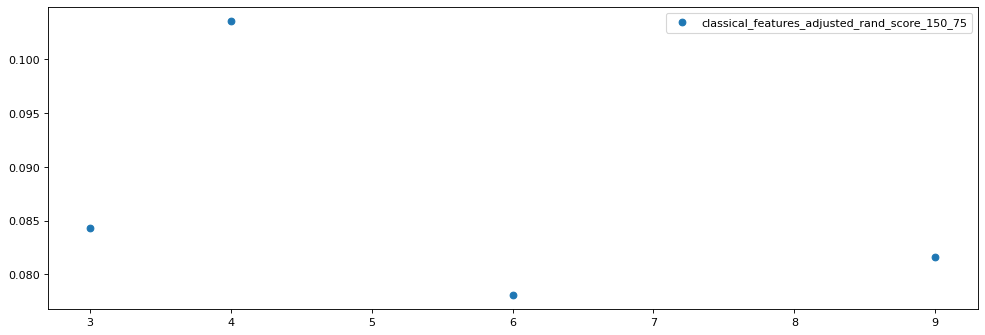

adjusted_rand_score_300_25


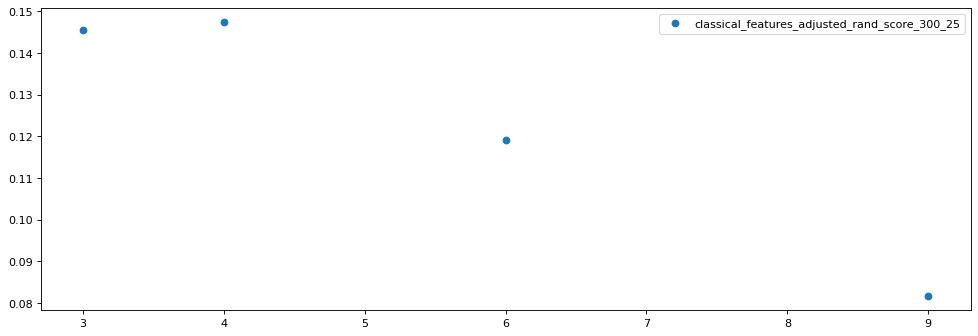

adjusted_rand_score_300_75


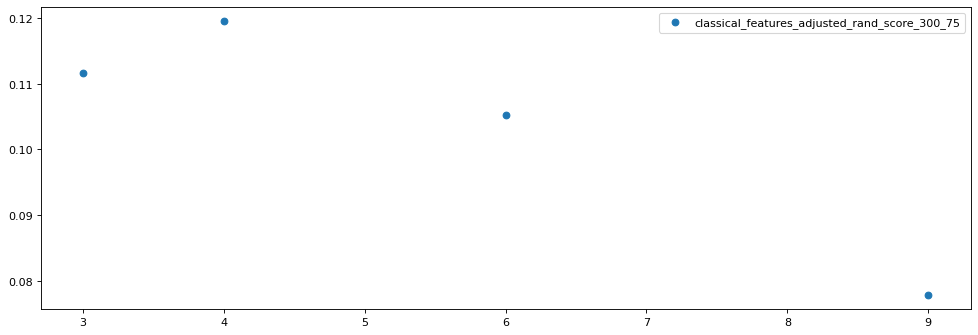

adjusted_rand_score_300_150


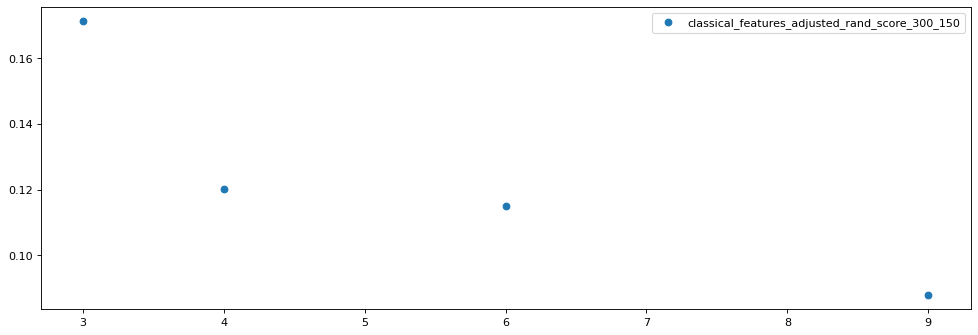

In [111]:
plot_scores(score_keys_filter, window_lengths, sub_sample_lengths, scores)

---- classical_features ----
timestamp


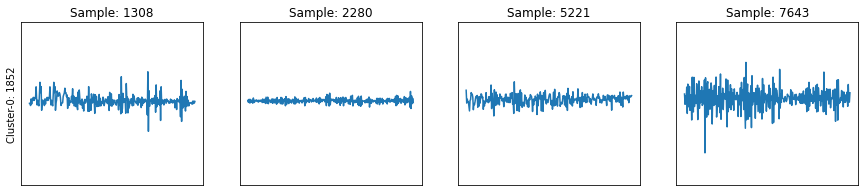

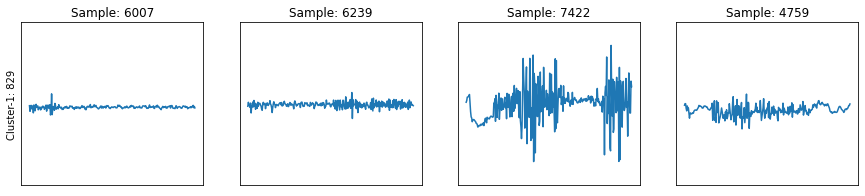

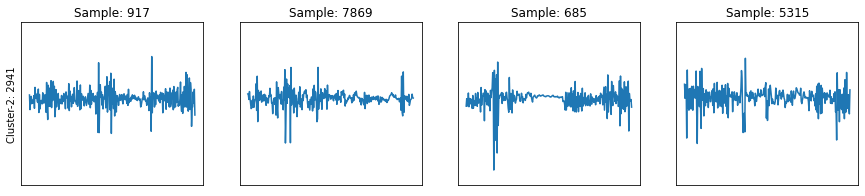

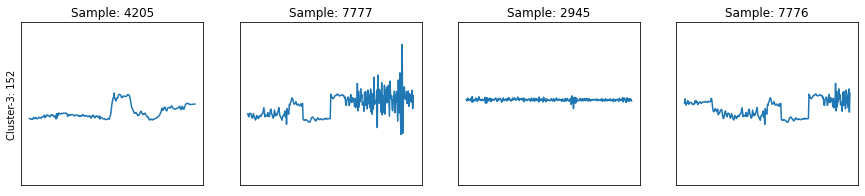

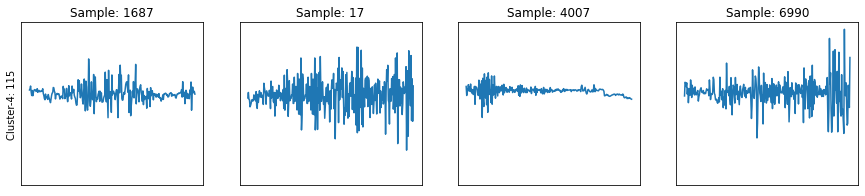

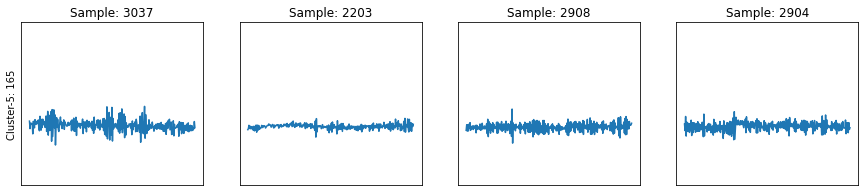

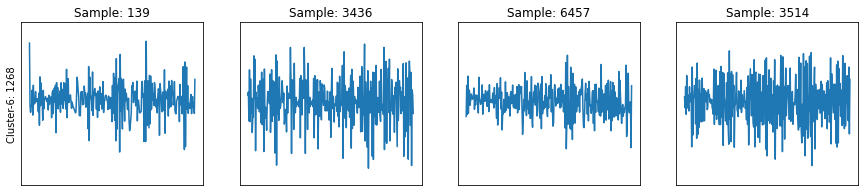

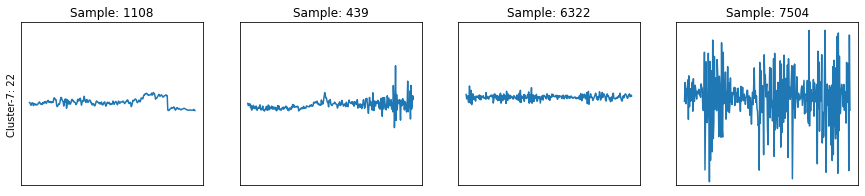

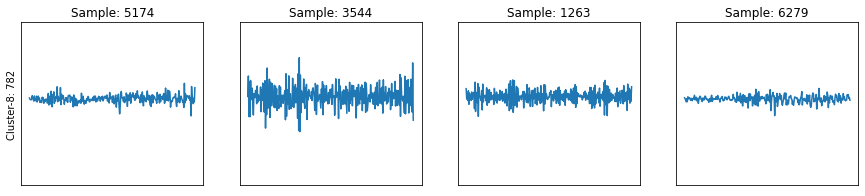

SensorAccelerationX_HD


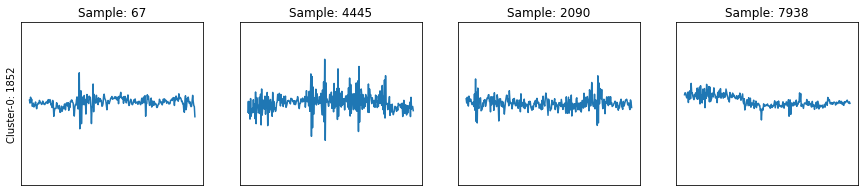

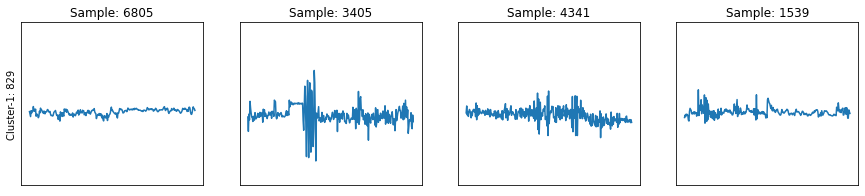

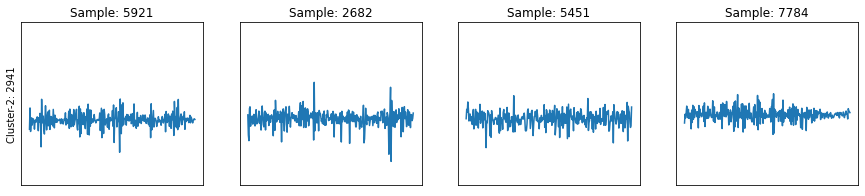

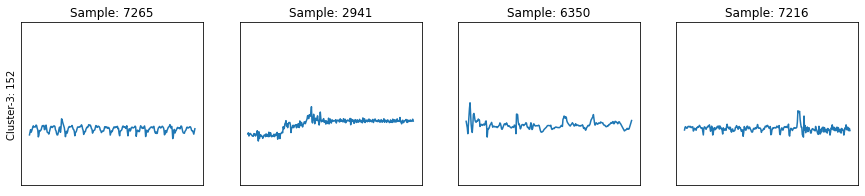

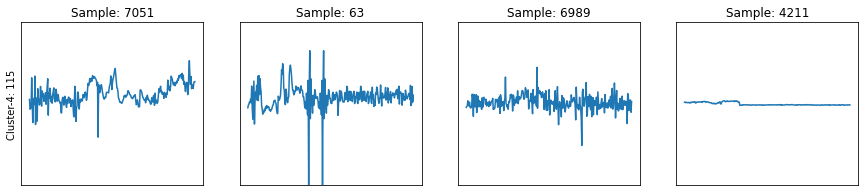

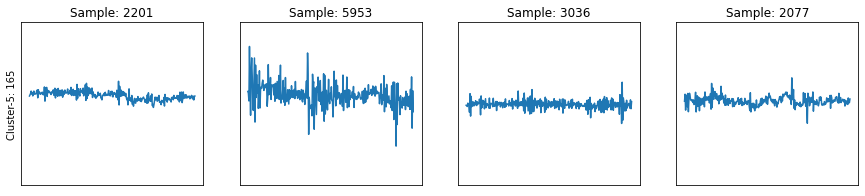

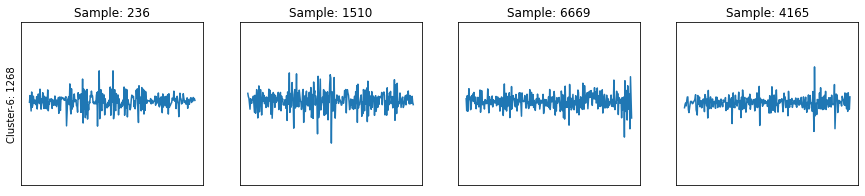

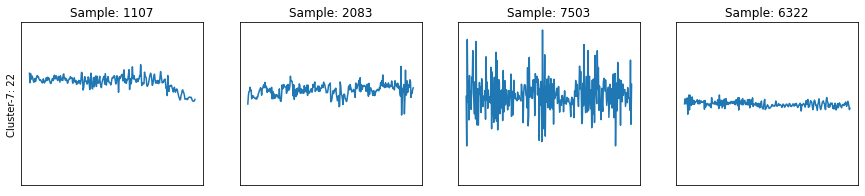

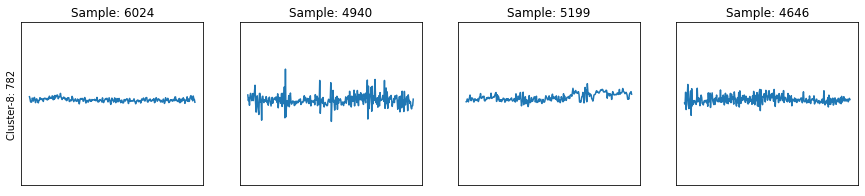

SensorAccelerationY_HD


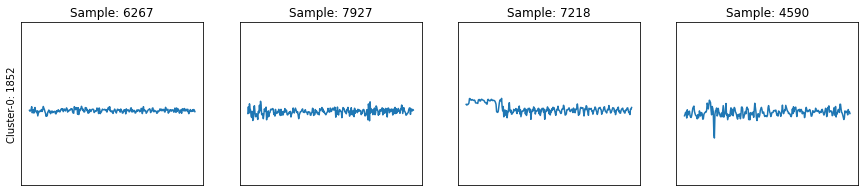

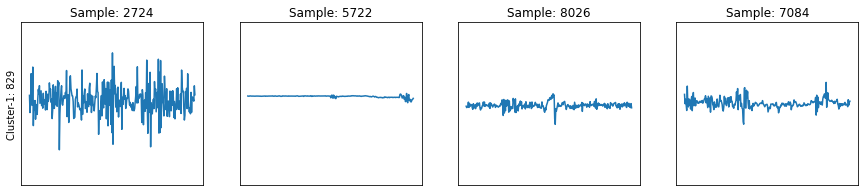

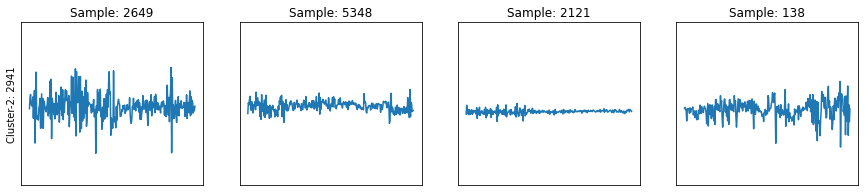

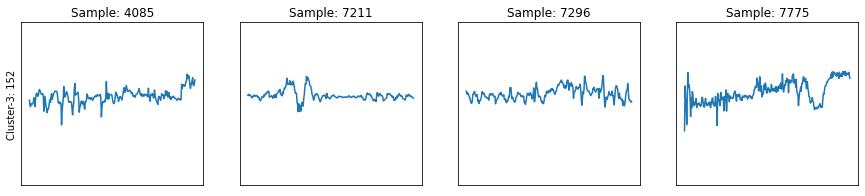

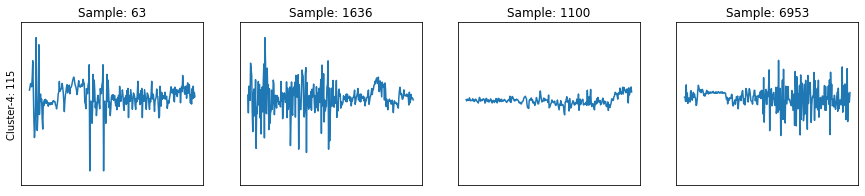

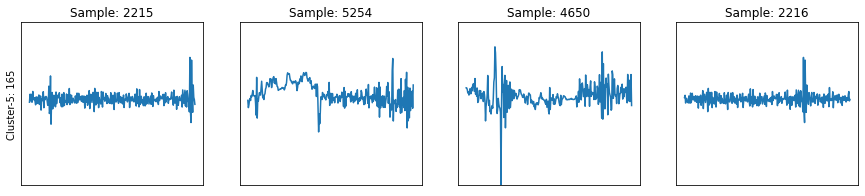

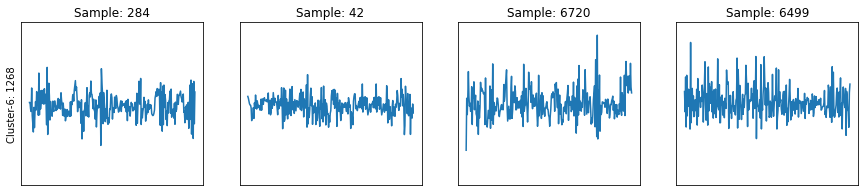

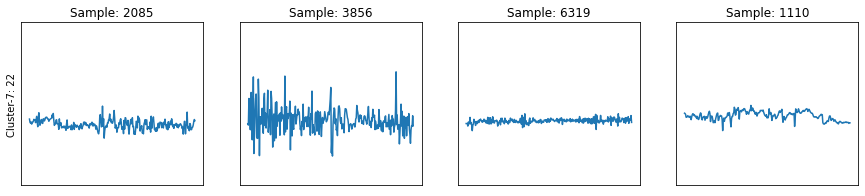

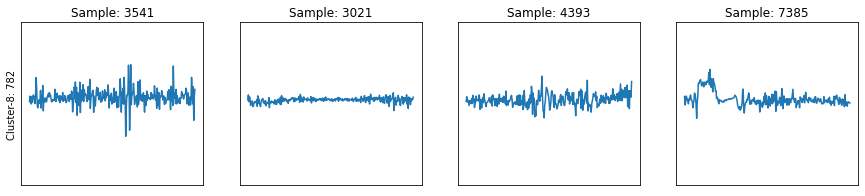

SensorAccelerationZ_HD


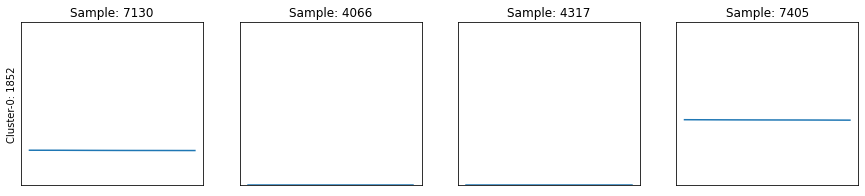

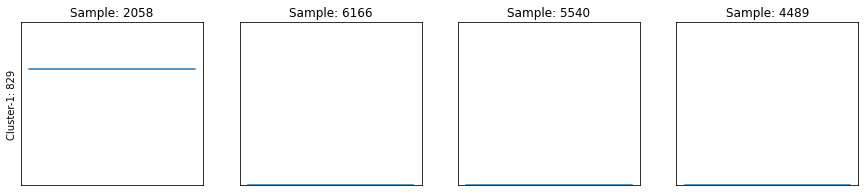

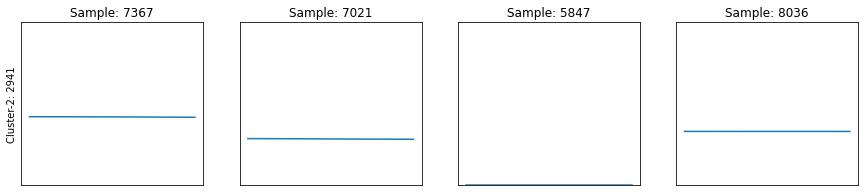

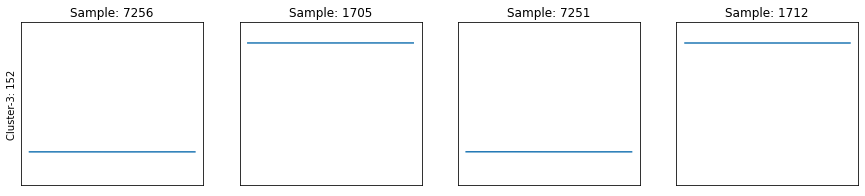

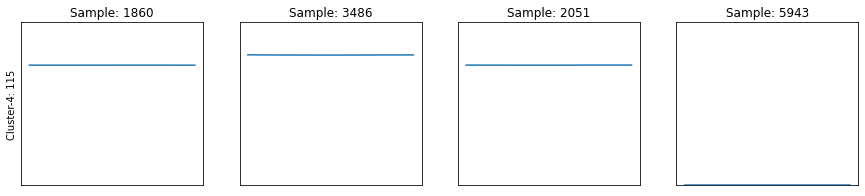

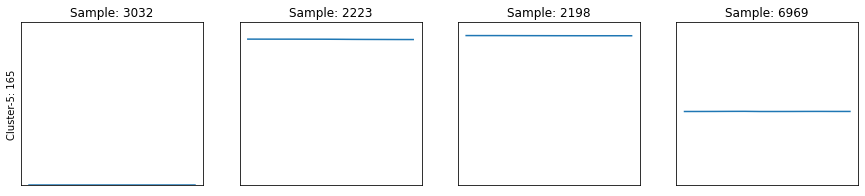

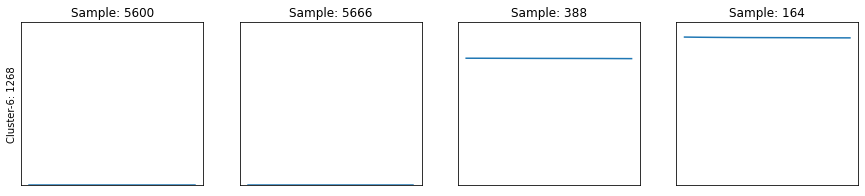

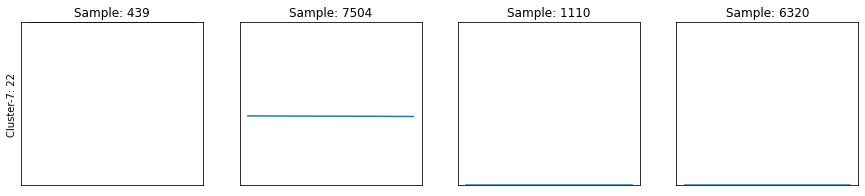

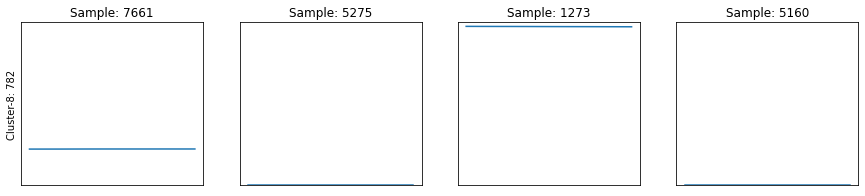

altitude


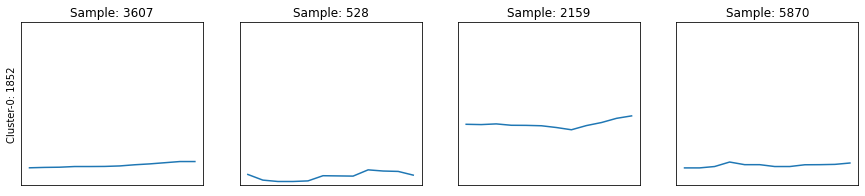

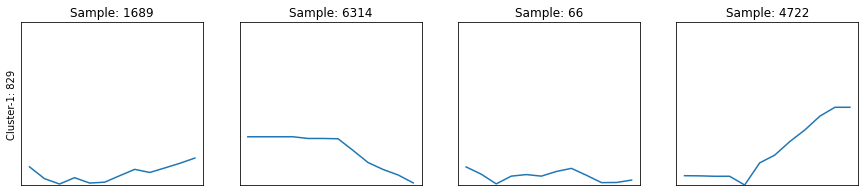

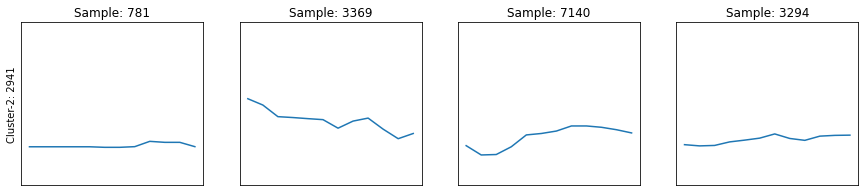

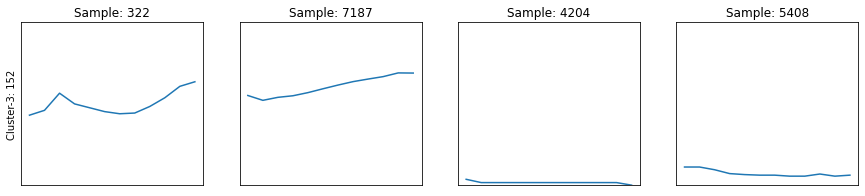

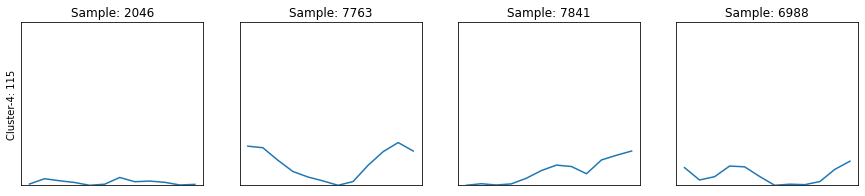

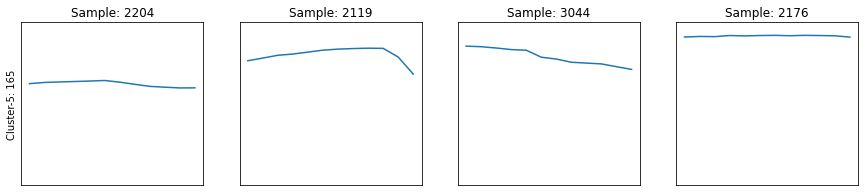

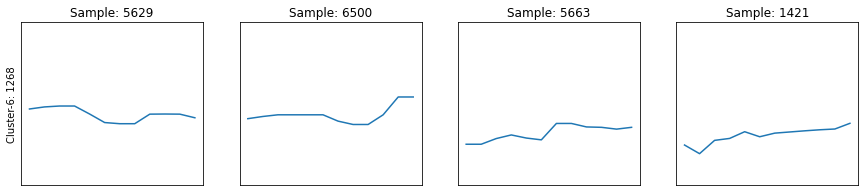

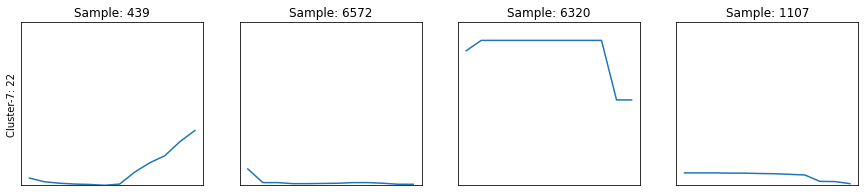

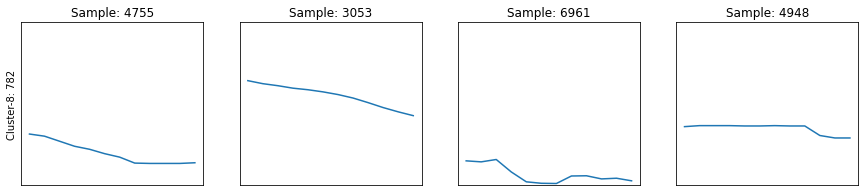

SensorSpeed


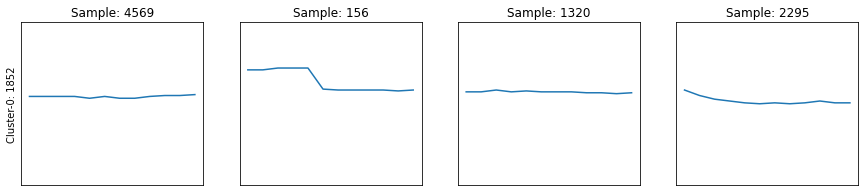

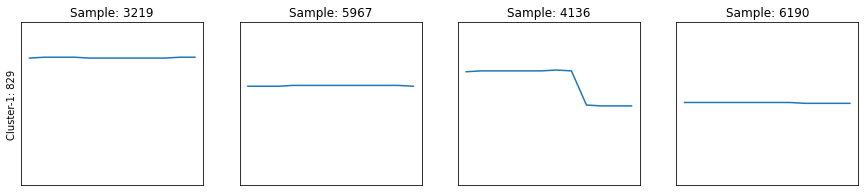

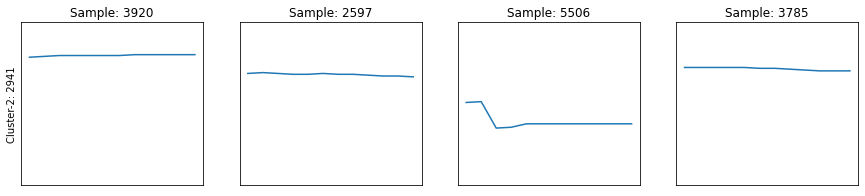

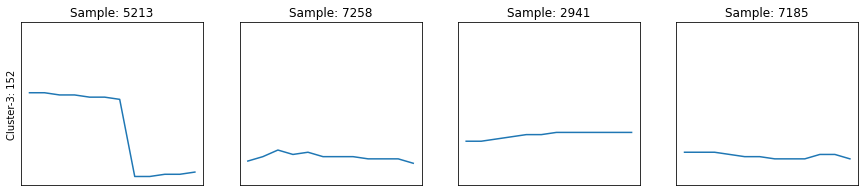

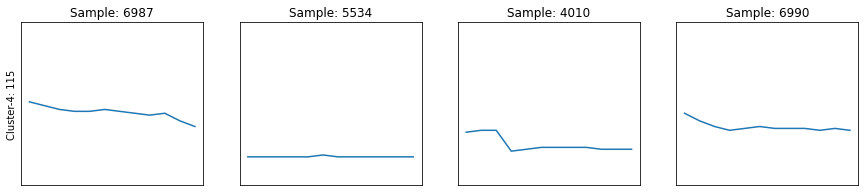

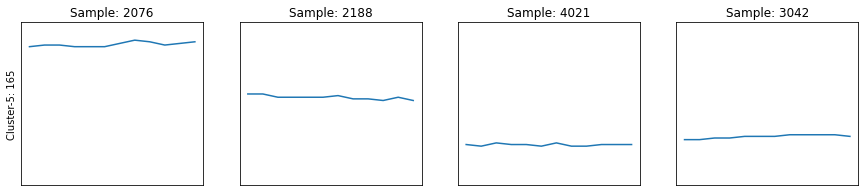

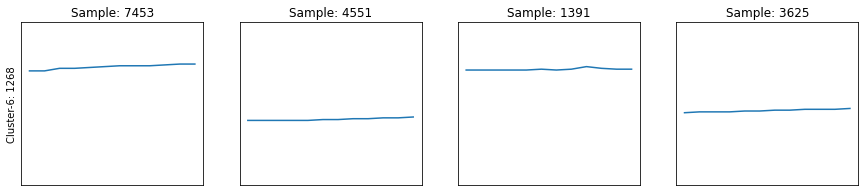

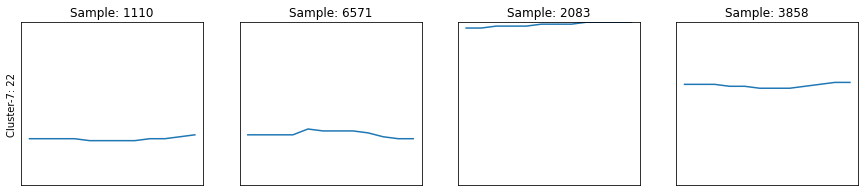

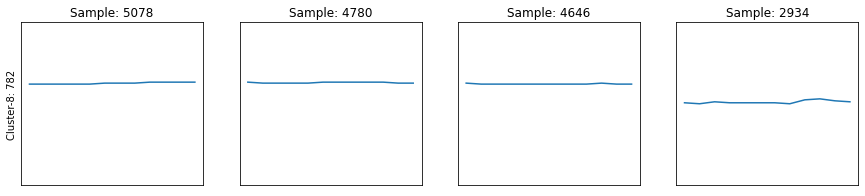

heart_rate


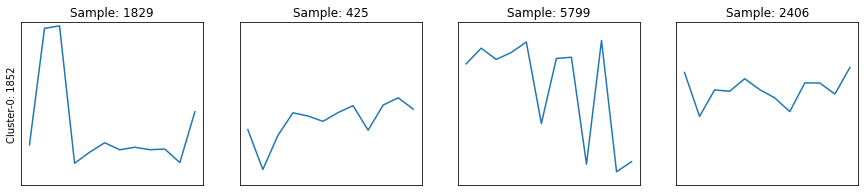

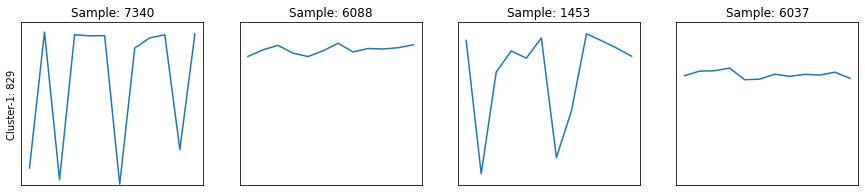

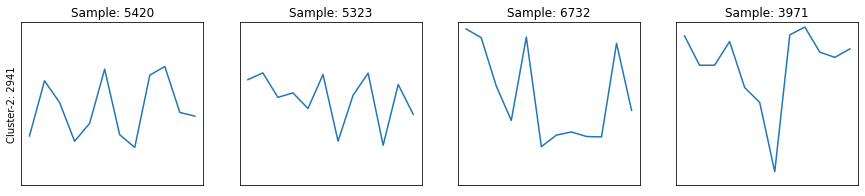

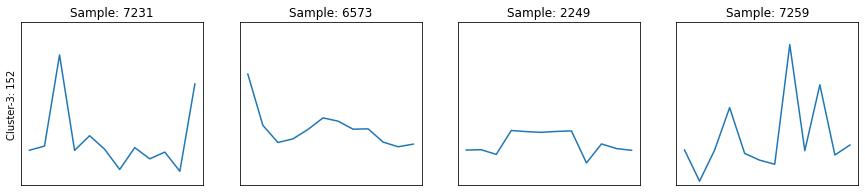

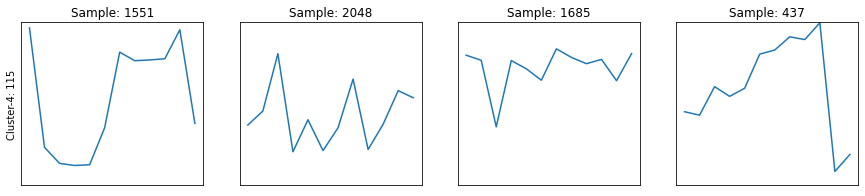

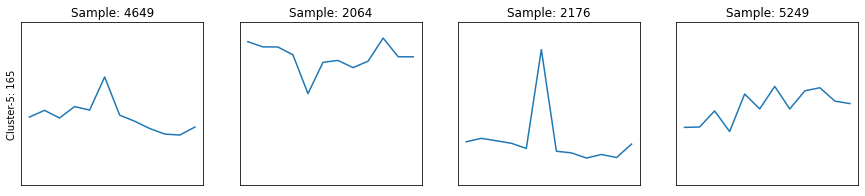

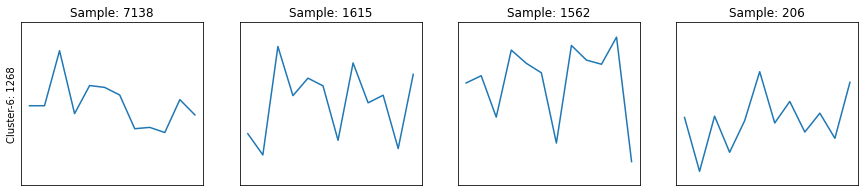

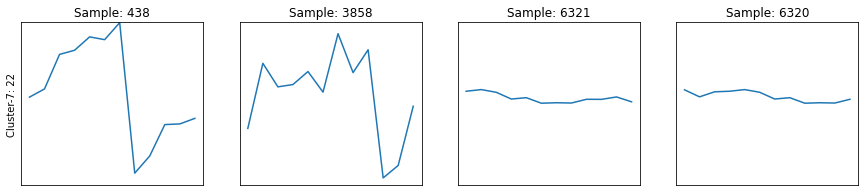

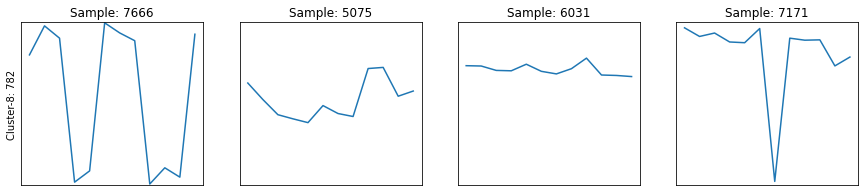

In [117]:
plot_random_samples(dataset_filename, 'classical_features', 300, 150, 9, input_columns)
# TODO: Write labels as text next to the plot